In [1]:
if(!require(jsonlite)){
    install.packages("jsonlite", repos="https://cran.rstudio.com/")
    library(jsonlite)
}
if(!require(forecast)){
    install.packages("forecast")
    library(forecast)
}
if(!require(xts)){
    install.packages("xts")
    library(xts)
}
if(!require(ggplot2)){
    install.packages("ggplot2")
    library(ggplot2)
}
library(repr)

options(repr.plot.width=6, repr.plot.height=3)

Loading required package: jsonlite
Loading required package: forecast
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: ggplot2


In [2]:
get_data <- function(required_dataset) 
{
    json_file <- 'https://datahub.io/core/bond-yields-uk-10y/datapackage.json'
    json_data <- fromJSON(paste(readLines(json_file), collapse=""))

    for(i in 1:length(json_data$resources$datahub$type)){
      if(json_data$resources$datahub$type[i]=='derived/csv' ){

        path_to_file = json_data$resources$path[i]
        file_name = tail(unlist(strsplit(path_to_file, '/')), 1)

        if(file_name == required_dataset){
            data <- read.csv(url(path_to_file))
        }
      }
    }
    return(data)
}

In [3]:
data = get_data('quarterly_csv.csv')

Warning message in readLines(json_file):
“incomplete final line found on 'https://datahub.io/core/bond-yields-uk-10y/datapackage.json'”

In [4]:
head(data)

Date,Rate
1984-03-31,10.9817
1984-06-30,11.5721
1984-09-30,11.9866
1984-12-31,11.1937
1985-03-31,11.6959
1985-06-30,11.3342


### TS

In [5]:
data.ts = ts(data$Rate, start = c(1984, 03), frequency = 4)

In [6]:
frequency(data.ts)

[1] 4

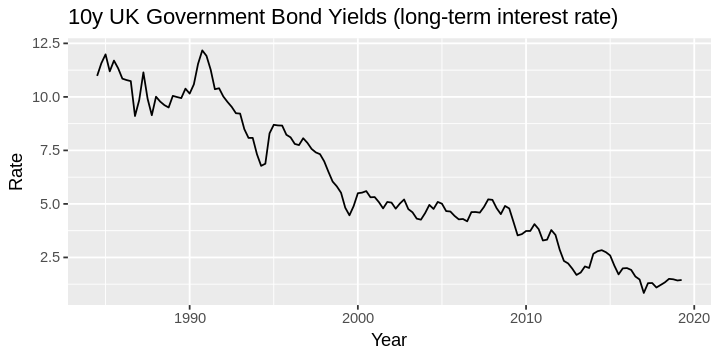

In [7]:
autoplot(data.ts) +
  ggtitle("10y UK Government Bond Yields (long-term interest rate)") +
  xlab("Year") +
  ylab("Rate")

### XTS

In [8]:
data.xts = xts(x = data$Rate, order.by = as.POSIXct(data$Date))

In [9]:
periodicity(data.xts)

Quarterly periodicity from 1984-03-31 to 2018-12-31 

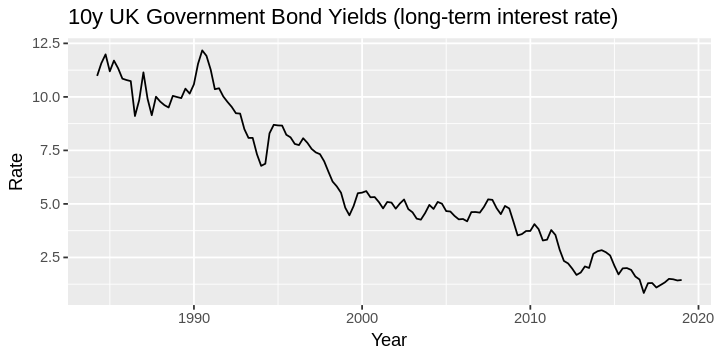

In [10]:
autoplot(data.xts) +
  ggtitle("10y UK Government Bond Yields (long-term interest rate)") +
  xlab("Year") +
  ylab("Rate")